<a href="https://colab.research.google.com/github/UTD-FinTech/Data-Analysis-Repos/blob/main/Data_Analysis_Model_for_CometVisor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Ryan Sharp & Harsha Kolachina
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt

# 1) Portfolio Allocation

# Read Data (my industry: e-commerce)
# Amazon
amzn = data.DataReader(['AMZN'], 'yahoo', start='2018/01/01', end='2019/12/31')
amzn = amzn['Adj Close']
# Shopify
shop = data.DataReader(['SHOP'], 'yahoo', start='2018/01/01', end='2019/12/31')
shop = shop['Adj Close']
# Alibaba
baba = data.DataReader(['BABA'], 'yahoo', start='2018/01/01', end='2019/12/31')
baba = baba['Adj Close']
# Ebay
ebay = data.DataReader(['EBAY'], 'yahoo', start='2018/01/01', end='2019/12/31')
ebay = ebay['Adj Close']

# ETF, separate from the e-commerce portfolio
spy = data.DataReader(['SPY'], 'yahoo', start='2018/01/01', end='2019/12/31')
spy = spy['Adj Close']

# Calculate normed returns, allocations and position values (portfolio starts at $1M total) (the ETF is $1M)
for stock, allo in zip((amzn, shop, baba, ebay, spy),[.3, .2, .4, .1, 1]):
    stock['Normed Return'] = stock / stock.iloc[0]
    stock['Allocation'] = stock['Normed Return'] * allo
    stock['Position Value'] = stock['Allocation'] * 1000000 #Assumes $1,000,000 initial portfolio value for allocation

# create list of all position values
all_pos_vals = [amzn['Position Value'], shop['Position Value'], baba['Position Value'], ebay['Position Value']]
etf = pd.DataFrame(spy['Position Value'])

# concatenate the list of position values into a dataframe
portfolio_val = pd.concat(all_pos_vals, axis=1)

# set the column names
portfolio_val.columns = ['AMZN', 'SHOP', 'BABA', 'EBAY']
etf.columns = ['SPY']

# add a total portfolio column
portfolio_val['Total'] = portfolio_val.sum(axis=1)

# Output normed return, allocation, & position value based on $1,000,000 portfolio value for growth stocks
#amzn.head()
#shop.head()
#baba.head()
#ebay.head()

# Output normed return, allocation, & position value based on $1,000,000 portfolio value for SPY ETF
spy.head()

# Output combined portfolio_val position values
portfolio_val.head()

,AMZN,SHOP,BABA,EBAY,Total
Date,,,,,
2018-01-02,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06
2018-01-03,303832.585415,204284.770465,400762.332949,103047.810631,1.011927e+06
2018-01-04,305192.544020,208455.776234,404486.823601,101339.975266,1.019475e+06
2018-01-05,310125.231382,209650.211528,415355.302556,104282.711114,1.039413e+06
2018-01-08,314598.695943,213005.973551,414549.432413,104571.721124,1.046726e+06


Sharpe Ratio of portfolio daily return: 0.07027157533412859
Sharpe Ratio of ETF daily return: 0.05075505616010221

Standard deviations:
E-commerce portfolio: 0.018857253235518425
ETF (SPY): 0.009428112634616861

Annualized Sharpe Ratios:
E-commerce portfolio: 1.1155266754250692
ETF (SPY): 0.8057115382724841



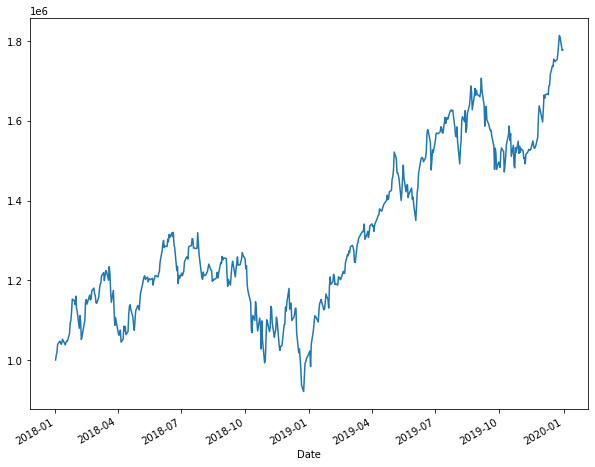

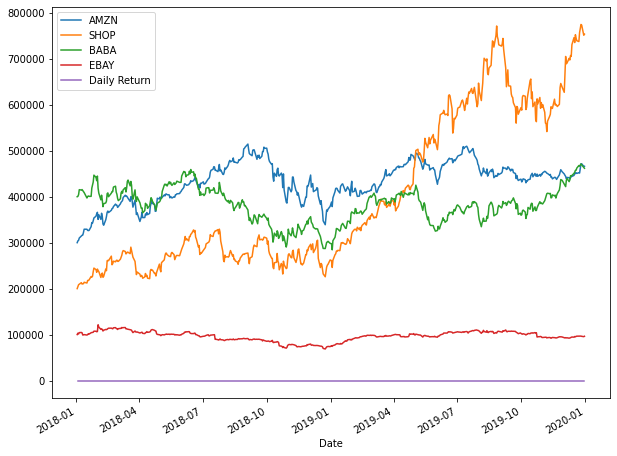

In [ ]:
# 2) Portfolio Statistics

# plot our portfolio & individual stocks
portfolio_val['Total'].plot(figsize=(10,8))
portfolio_val.drop('Total', axis=1).plot(figsize=(10,8))

# plot histogram of daily returns for growth stock portfolio and etf
''' portfolio_val['Daily Return'].plot(kind='hist', bins=50, figsize=(4,5))
etf['Daily Return'].plot(kind='hist', bins=50, figsize=(4,5))
plt.show() '''

# Daily Return of growth stock portfolio & ETF
portfolio_val['Daily Return'] = portfolio_val['Total'].pct_change(1)
etf['Daily Return'] = etf.pct_change()

# Average Daily Returns of growth stock portfolio & ETF
mean_portfolio = portfolio_val['Daily Return'].mean()
mean_etf = etf['Daily Return'].mean()

# Cumulative returns for portfolio
cum_return_portfolio = 100 * (portfolio_val['Total'][-1]/portfolio_val['Total'][0] - 1)

# ---SHARPE RATIO Calculation---
# Standard deviation of portfolio & ETF daily returns
std_portfolio = portfolio_val['Daily Return'].std()
std_etf = etf['Daily Return'].std()

# Sharpe Ratios for portfolio & ETF daily returns
sr_portfolio = mean_portfolio / std_portfolio
sr_etf = mean_etf / std_etf

print(f"Sharpe Ratio of portfolio daily return: {sr_portfolio}\nSharpe Ratio of ETF daily return: {sr_etf}") #0.0703, 0.0508

# Annualized Sharpe Ratios (extrapolated from daily returns ratios)
ASR_portfolio = (252**0.5) * sr_portfolio
ASR_etf = (252**0.5) * sr_etf

print(f"\nStandard deviations:\nE-commerce portfolio: {sd_portfolio}\nETF (SPY): {sd_etf}\n")
print(f"Annualized Sharpe Ratios:\nE-commerce portfolio: {ASR_stocks}\nETF (SPY): {ASR_etf}\n") #1.116, 0.806

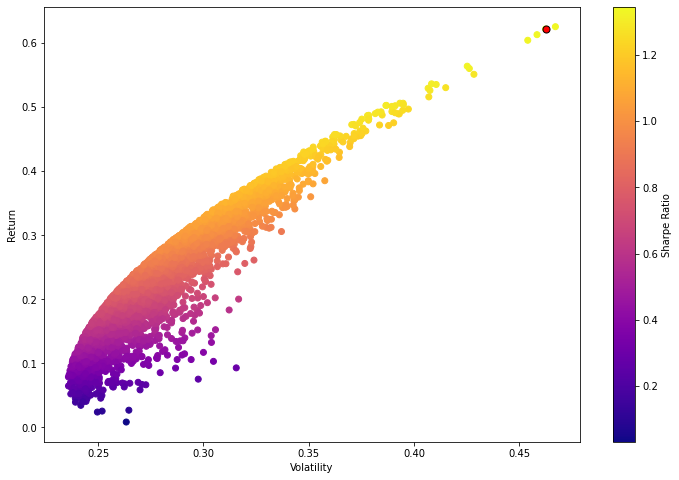

In [ ]:
# ---Portfolio Optimization using MONTE CARLO SIMULATIONS---
# Maximize the Sharpe Ratios by minimizing the negative Sharpe Ratios

#create new dataframe of our portfolio's stocks
stocks = pd.concat(all_pos_vals, axis=1)
stocks.columns = ['AMZN', 'SHOP', 'BABA', 'EBAY']

# Arithmetic mean daily return
stocks.pct_change(1).mean()
#stocks.pct_change(1).head()

# log daily return
log_return = np.log(stocks/stocks.shift(1))
log_return.head()

# Set weights to a random numpy array
# Rebelance the weights so they add up to one
# Calculate the expected portfolio return 
# Calculate the expected portfolio volatility
# Calculate the Sharpe Ratio
# Repeat above steps on 5000 different portfolios to arrive at proper portfolio allocation optimization
num_ports = 5000
all_weights = np.zeros((num_ports, len(stocks.columns))) # weights of all 4 stocks in all 5000 ports
ret_arr = np.zeros(num_ports) #return of each port
vol_arr = np.zeros(num_ports) #volatility measurement of each port
sharpe_arr = np.zeros(num_ports) #sharpe ratio of each port

for ind in range(num_ports):
    # weights
    weights = np.array(np.random.random(4))
    weights = weights / np.sum(weights)

    # save weights
    all_weights[ind, :] = weights

    # expected return
    ret_arr[ind] = np.sum((log_return.mean() * weights) * 252)

    # expected volatility
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_return.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind] / vol_arr[ind]

# Find allocation with the highest sharpe ratio
max_sr_index = sharpe_arr.argmax()
max_sr_ret = ret_arr[max_sr_index]
max_sr_vol = vol_arr[max_sr_index]


# Plot the data
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
# Add a red dot for max_sr_vol & max_sr_ret
plt.scatter(max_sr_vol, max_sr_ret, c='red', s=50, edgecolors='black')
plt.show()